In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tifffile
from pathlib import Path, PureWindowsPath
import pandas as pd
import tqdm
import cv2

In [2]:
b1 = tifffile.TiffFile("C:/Users/ricar/tccpy/data/04.Imagens_de_Satelite/02.SR/S2A_MSI_2018_05_20_13_22_41_T22JGR_rhos_443.tif")
b2 = tifffile.TiffFile("C:/Users/ricar/tccpy/data/04.Imagens_de_Satelite/02.SR/S2A_MSI_2018_05_20_13_22_41_T22JGR_rhos_492.tif")
b3 = tifffile.TiffFile("C:/Users/ricar/tccpy/data/04.Imagens_de_Satelite/02.SR/S2A_MSI_2018_05_20_13_22_41_T22JGR_rhos_560.tif")
b4 = tifffile.TiffFile("C:/Users/ricar/tccpy/data/04.Imagens_de_Satelite/02.SR/S2A_MSI_2018_05_20_13_22_41_T22JGR_rhos_665.tif")
b5 = tifffile.TiffFile("C:/Users/ricar/tccpy/data/04.Imagens_de_Satelite/02.SR/S2A_MSI_2018_05_20_13_22_41_T22JGR_rhos_704.tif")
b6 = tifffile.TiffFile("C:/Users/ricar/tccpy/data/04.Imagens_de_Satelite/02.SR/S2A_MSI_2018_05_20_13_22_41_T22JGR_rhos_740.tif")
b7 = tifffile.TiffFile("C:/Users/ricar/tccpy/data/04.Imagens_de_Satelite/02.SR/S2A_MSI_2018_05_20_13_22_41_T22JGR_rhos_783.tif")
b8 = tifffile.TiffFile("C:/Users/ricar/tccpy/data/04.Imagens_de_Satelite/02.SR/S2A_MSI_2018_05_20_13_22_41_T22JGR_rhos_833.tif")

In [3]:
aux_dict = dict()
for page in b1.pages:
    for value in page.tags.values():
        aux_dict[value.name] = value.value

In [4]:
b1 = b1.asarray()
b2 = b2.asarray()
b3 = b3.asarray()
b4 = b4.asarray()
b5 = b5.asarray()
b6 = b6.asarray()
b7 = b7.asarray()
b8 = b8.asarray()

In [5]:
def get_coord_from_pixel_pos(i, j, start_value_x, start_value_y, scale_x, scale_y):
    """
    i : int - coord x 
    j : int - coord y
    start_value_x : int - start coord x UTM
    start_value_y : int - start coord y UTM
    scale_x : int - pixel/meter scale x
    scale_y : int - pixel/meter scale y
    """
    return (start_value_x+scale_x*i, start_value_y-scale_y*j)

def get_pixel_from_coord(coord_x,coord_y, scale_x, scale_y, start_x, start_y):
    return (int((coord_x-start_x)/scale_x), int((start_y-coord_y)/scale_y))

In [6]:
scale_x = aux_dict['ModelPixelScaleTag'][0]
scale_y = aux_dict['ModelPixelScaleTag'][1]
start_value_x = aux_dict['ModelTiepointTag'][3]
start_value_y = aux_dict['ModelTiepointTag'][4]

In [7]:
bat_path = "C:/Users/ricar/tccpy/data/02.Dados_Processados/02.XYZ/BATIMETRIA_PROCESSADA_BABITONGA_2018_DHN_WGS84_UTM22S.xyz"

In [8]:
df = pd.read_csv(bat_path, sep=" ", header=None)
df

,0,1,2
0,720507.82,7089857.17,1.96
1,720507.95,7089857.15,1.98
2,720508.07,7089857.12,1.98
3,720508.19,7089857.09,1.97
4,720508.31,7089857.07,1.98
5,720508.42,7089857.04,1.98
6,720508.54,7089857.01,1.96
7,720508.67,7089856.98,1.95
8,720508.79,7089856.94,1.94
9,720508.92,7089856.91,1.94


In [9]:
b1col = list()
b2col = list()
b3col = list()
b4col = list()
b5col = list()
b6col = list()
b7col = list()
b8col = list()

for i, row in tqdm.tqdm(enumerate(df.itertuples())):
    x = row[1]
    y = row[2]
    z = row[3]
    pixelpos = get_pixel_from_coord(x, y, scale_x, scale_y, start_value_x, start_value_y)
    b1col.append(b1[pixelpos[1]][pixelpos[0]])
    b2col.append(b2[pixelpos[1]][pixelpos[0]])
    b3col.append(b3[pixelpos[1]][pixelpos[0]])
    b4col.append(b4[pixelpos[1]][pixelpos[0]])
    b5col.append(b5[pixelpos[1]][pixelpos[0]])
    b6col.append(b6[pixelpos[1]][pixelpos[0]])
    b7col.append(b7[pixelpos[1]][pixelpos[0]])
    b8col.append(b8[pixelpos[1]][pixelpos[0]])

df["b1"] = b1col
df["b2"] = b2col
df["b3"] = b3col
df["b4"] = b4col
df["b5"] = b5col
df["b6"] = b6col
df["b7"] = b7col
df["b8"] = b8col

557244it [00:03, 170834.57it/s]


In [10]:
df

,0,1,2,b1,b2,b3,b4,b5,b6,b7,b8
0,720507.82,7089857.17,1.96,0.014626,0.021292,0.037445,0.031290,0.039947,0.020808,0.203558,0.017011
1,720507.95,7089857.15,1.98,0.014626,0.021292,0.037445,0.031290,0.039947,0.020808,0.203558,0.017011
2,720508.07,7089857.12,1.98,0.014626,0.021292,0.037445,0.031290,0.039947,0.020808,0.203558,0.017011
3,720508.19,7089857.09,1.97,0.014626,0.021292,0.037445,0.031290,0.039947,0.020808,0.203558,0.017011
4,720508.31,7089857.07,1.98,0.014626,0.021292,0.037445,0.031290,0.039947,0.020808,0.203558,0.017011
5,720508.42,7089857.04,1.98,0.014626,0.021292,0.037445,0.031290,0.039947,0.020808,0.203558,0.017011
6,720508.54,7089857.01,1.96,0.014626,0.021292,0.037445,0.031290,0.039947,0.020808,0.203558,0.017011
7,720508.67,7089856.98,1.95,0.014626,0.021292,0.037445,0.031290,0.039947,0.020808,0.203558,0.017011
8,720508.79,7089856.94,1.94,0.014626,0.021292,0.037445,0.031290,0.039947,0.020808,0.203558,0.017011
9,720508.92,7089856.91,1.94,0.014626,0.021292,0.037445,0.031290,0.039947,0.020808,0.203558,0.017011


In [11]:
def ndwi(first_band, second_band):
    if first_band.shape != second_band.shape:
        return None

    output = np.zeros(first_band.shape)

    for i in tqdm.tqdm(range(first_band.shape[0])):
        for j in range(first_band.shape[1]):
            temp1 = first_band[i][j] - second_band[i][j]
            temp2 = first_band[i][j] + second_band[i][j]
            
            if temp2 == 0:
                output[i][j] = 1
                print("deu pau")
            else:
                temp3 = temp1/temp2
                output[i][j] = temp3
                
    return output

In [12]:
ndwib3b8 = ndwi(b3,b8)

100%|██████████████████████████████████████████████████████████████████████████████| 5298/5298 [02:01<00:00, 43.46it/s]


In [13]:
wf_th = 0.3

In [27]:
ndwib3b8 = (ndwib3b8[:,:] > wf_th)
ndwib3b8

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True]])

In [14]:
water_filter = (ndwib3b8[:,:] > wf_th).astype(np.uint8)*255

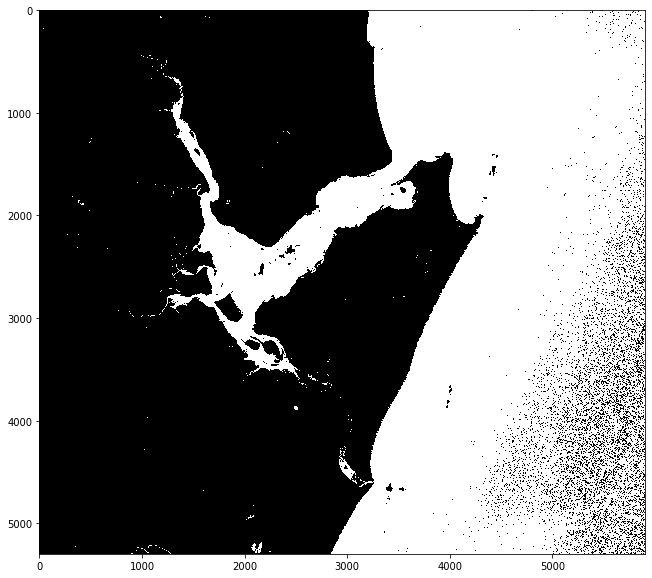

In [15]:
plt.figure(figsize=(12,10))
plt.imshow(water_filter, "gray")

In [16]:
bgr_image = np.dstack((b2,b3,b4))
bgr_image = bgr_image + 0.1
bgr_image = bgr_image.clip(0,1)

In [17]:
bgr_image = (bgr_image*255.99).astype(np.uint8)

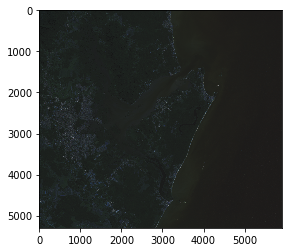

In [18]:
plt.imshow(bgr_image)

In [19]:
cv2.imwrite("rgbresult.jpg", bgr_image)

True

In [20]:
import joblib as jb
from lightgbm import LGBMRegressor
import colorsys

In [21]:
jbpath = "lgbm_baseline.pkl.z"

In [22]:
lgbm = jb.load(jbpath)

In [23]:
p = get_pixel_from_coord(720507.82,7089857.17, scale_x, scale_y, start_value_x, start_value_y)
i = p[1]
j = p[0]
np.array([b6[i][j],b5[i][j],b4[i][j],b2[i][j],b3[i][j],b7[i][j],b8[i][j],b1[i][j]]).reshape(1,-1)

array([[0.02080799, 0.03994652, 0.03129008, 0.02129183, 0.0374453 ,
        0.20355827, 0.01701066, 0.01462582]], dtype=float32)

In [50]:
b7fix = b7.shape[0]/float(b1.shape[0])
b7fix

0.6647791619479049

In [ ]:
b7fix = b7.shape[0]/float(b1.shape[0])

aux = list()
for i in tqdm.tqdm(range(bgr_image.shape[0])):
    for j in range(bgr_image.shape[1]):
        if ndwib3b8[i][j]:
            aux.append(np.array([j,i,b6[i][j],b5[i][j],b4[i][j],b2[i][j],b3[i][j],b7[int(np.clip(i*b7fix,0,b7.shape[0]))][j],b8[i][j],b1[i][j]]))
            

In [ ]:
dfaux = pd.DataFrame(aux)

In [57]:
dfaux.columns = ["px","py","reflectance_0","reflectance_1","reflectance_2","reflectance_3","reflectance_4","reflectance_5","reflectance_6","reflectance_7"]

In [60]:
z = lgbm.predict(dfaux.drop(["px","py"],axis=1))

In [62]:
dfaux["z"] = z

In [83]:
dfaux["z"].describe()

count    1.339560e+07
mean     2.014893e+01
std      5.638718e+00
min     -2.859339e+00
25%      1.887177e+01
50%      2.194745e+01
75%      2.362718e+01
max      3.908326e+01
Name: z, dtype: float64

In [64]:
jb.dump(dfaux,"dfaux.pkl.z")

['dfaux.pkl.z']

In [96]:
output = bgr_image.copy()
for i, row in tqdm.tqdm(enumerate(dfaux.itertuples())):
    x = int(row[1])
    y = int(row[2])
    z = row[11]
    output[y][x] = [int(e*255) for e in (colorsys.hls_to_rgb(z/40, 0.5, 1))]










0it [00:00, ?it/s]








16952it [00:00, 168294.36it/s]








34372it [00:00, 169583.57it/s]








51478it [00:00, 169601.62it/s]








68058it [00:00, 168071.12it/s]








84719it [00:00, 167509.12it/s]








101509it [00:00, 167260.04it/s]








118293it [00:00, 167067.93it/s]








134821it [00:00, 166160.53it/s]








150470it [00:00, 159289.55it/s]








166492it [00:01, 157353.16it/s]








181801it [00:01, 146344.46it/s]








197614it [00:01, 149387.13it/s]








213643it [00:01, 152181.64it/s]








230097it [00:01, 155582.69it/s]








246785it [00:01, 158473.28it/s]








263478it [00:01, 160583.94it/s]








280680it [00:01, 163510.45it/s]








298022it [00:01, 166014.84it/s]








315776it [00:01, 169194.83it/s]








333209it [00:02, 170582.11it/s]








351036it [00:02, 172451.85it/s]








368769it [00:02, 173514.41it/s]








386278it [00:02, 173605.85it/s]








403651it [00:02, 170711.93it/s]








420742it 

In [99]:
output = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)

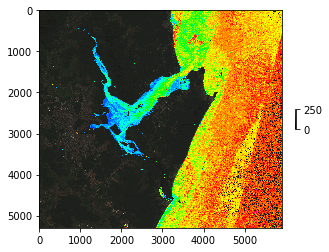

In [107]:
plt.imshow(output,"gray")

In [102]:
cv2.imwrite("predictResult.jpg", output)

True

In [ ]:
posx = 0.7
posy = 0.3
height = 0.5
width = 0.1

heightPixel = output.shape[1] * height
widthPixel = output.shape[0] * width
x = output.shape[0]*posx
y = output.shape[1]*posy
cv2.rectangle(output, (x, y), (w, h), (255, 255, 255), -1)

In [ ]:
x